In [5]:
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns

In [6]:
data = pd.read_csv("Customers_segmentation.csv")

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.shape

(200, 5)

In [9]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income',
       'Spending_Score']

In [13]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data['Gender'] = data['Gender'].map({"Male":0,"Female":1})

In [15]:
x = data.drop("CustomerID",axis=1)

In [16]:
x.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [17]:
from sklearn.preprocessing import StandardScaler

features = ['Gender','Age', 'Annual_Income', 'Spending_Score']
scaler = StandardScaler()
x[features] = scaler.fit_transform(x[features])


In [18]:
x.head()

,Gender,Age,Annual_Income,Spending_Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [19]:
# sns.distplot(x['Annual_Income'],kde=True)
# plt.show()
# sns.distplot(x['Spending_Score'],kde=True)
# plt.show()

In [20]:
# sns.pairplot(x)
# plt.show()

In [21]:
from sklearn.decomposition import PCA


# assume X is a pandas DataFrame containing the data to be transformed
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# convert the transformed data back to a pandas DataFrame for further analysis or visualization
X_pca_df = pd.DataFrame(data=X_pca, columns=['f1', 'f2'])

In [22]:
X_pca_df.head()

,f1,f2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


In [23]:
from sklearn.cluster import KMeans

In [24]:
sse_ = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_pca_df)

  sse_.append(kmeans.inertia_)

C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

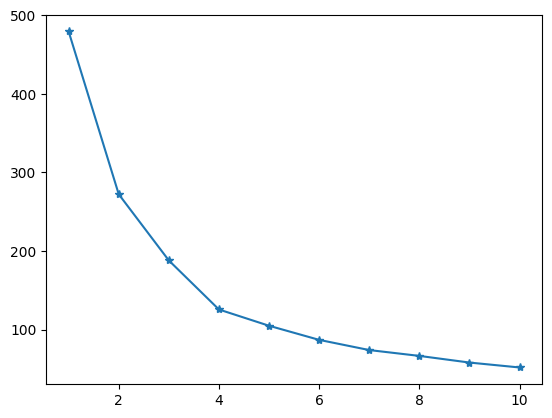

In [25]:
plt.plot(range(1,11),sse_,marker='*')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X_pca_df)


C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
X_pca_df['cluster'] = Y
X_pca_df.head()

,f1,f2,cluster
0,-0.406383,-0.520714,0
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,1
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,1


In [28]:
df1 = X_pca_df[X_pca_df.cluster == 0]
df2 = X_pca_df[X_pca_df.cluster == 1]
df3 = X_pca_df[X_pca_df.cluster == 2]
df4 = X_pca_df[X_pca_df.cluster == 3]


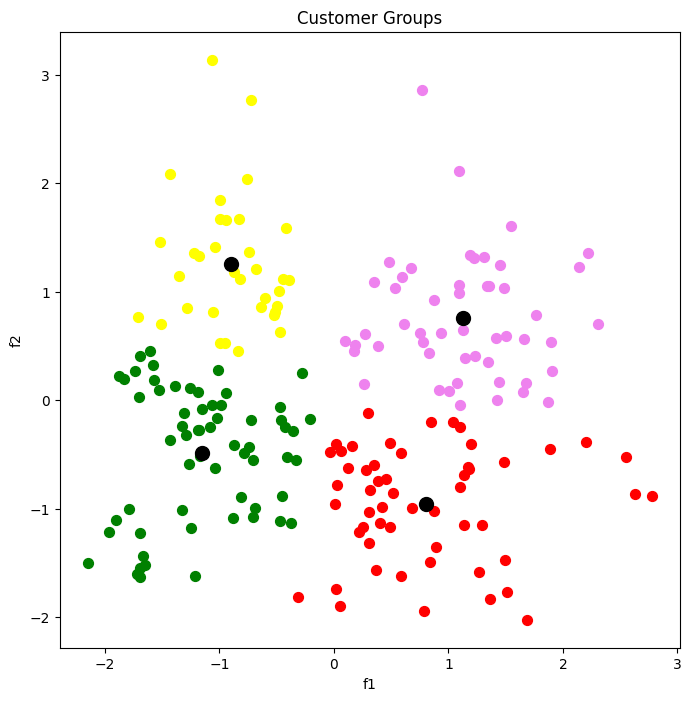

In [33]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(df1['f1'],df1['f2'], s=50, c='green', label='Cluster 1')
plt.scatter(df2['f1'],df2['f2'] , s=50, c='red', label='Cluster 2')
plt.scatter(df3['f1'],df3['f2'], s=50, c='yellow', label='Cluster 3')
plt.scatter(df4['f1'],df4['f2'], s=50, c='violet', label='Cluster 4')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()


In [30]:
from sklearn.metrics import  silhouette_score

score = silhouette_score(X_pca_df,Y)

print(score)


0.5717319994118709
